For lemon1.jpg


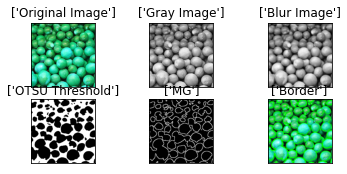

Total Lemons in lemon1.jpg is :  42
**************************************************
For lemon2.jpg


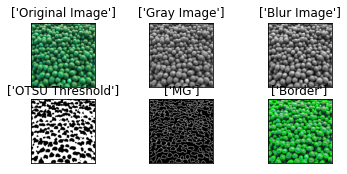

Total Lemons in lemon2.jpg is :  96
**************************************************
For lemon3.jpg


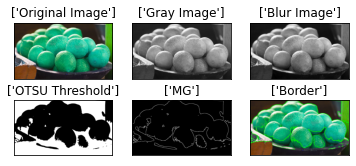

Total Lemons in lemon3.jpg is :  43
**************************************************
For lemon4-586.jpg


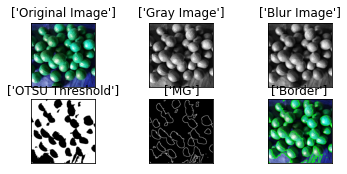

Total Lemons in lemon4-586.jpg is :  28
**************************************************
For lemon5.jpg


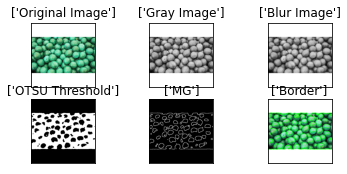

Total Lemons in lemon5.jpg is :  59
**************************************************
For lemon6.jpg


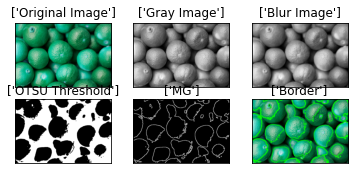

Total Lemons in lemon6.jpg is :  45
**************************************************
For lemon7.jpg


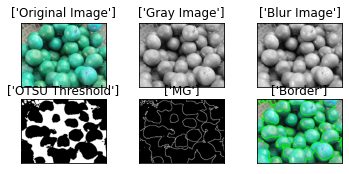

Total Lemons in lemon7.jpg is :  32
**************************************************
For lemons1.jpeg


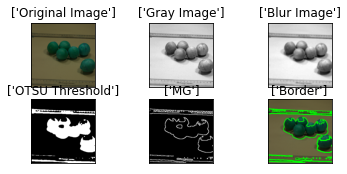

Total Lemons in lemons1.jpeg is :  18
**************************************************


In [101]:
## Importing all the required libraries
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Here Iterate over the folder where the images are saved
path = 'D:/Airprobe'
files = os.listdir(path)

for image in files:
    
    print('For',image)
    ## Getting Original Image
    org_img = cv2.imread('D:/Airprobe'+'/'+image)
    
    ## In which it converts the RGB into gray scale to reduce the dimensionality of the image for further process to work
    gray_img = cv2.imread('D:/Airprobe'+'/'+image,cv2.IMREAD_GRAYSCALE)
    
    ## Blurring the Image
    ## It will smoothen the edges and removes the noise and also important a processs for Thersholding,Edge Detection
    blur = cv2.GaussianBlur(gray_img,(5,5),5)
    # (7,7) - kernal value ; 1 - sigma value ; The blur will increase with respect to sigma

    ## Here the value of threshold is obtained automatically using the OTSU Thresholding method
    val, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    ## Laplac Edge Detection
    #It is used to detect the edges in the image
    laplac = cv2.Laplacian(threshold,cv2.CV_64F,ksize=1)
    laplac = np.uint8(np.absolute(laplac))

    ## Morphological Transformation
    ## Morphology Gradient is a difference between opening and closing in the image which will helpful for complete the pixel to 1  
    kernal = np.ones((2, 2), np.uint8)
    mg = cv2.morphologyEx(laplac, cv2.MORPH_GRADIENT, kernal)
    ## kernel-used the image with the set of pixel for dilation

    ## Find the Contours  
    cnt, heirarchy = cv2.findContours(mg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    ## cv2.RETR_EXTERNAL-Retrives Exterme outer contours ; cv2.CHAIN_APPROX_NONE - Get all the contours
    border = cv2.drawContours(org_img.copy(), cnt, -1, (0, 255, 0), 2)
    ## cnt-contours value ; -1 = Contour Index to draw contours ; (0,255,0) - color value ; 2 - Thickness to draw the line

    title = ['Original Image','Gray Image','Blur Image', 'OTSU Threshold', 'MG','Border']
    images = [org_img,gray_img,blur,threshold, mg,border]

    ## Here Stacking the multiple image 
    for i in range(6):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i],'gray')
        plt.title([title[i]])
        plt.xticks([]),plt.yticks([])
    plt.show()
    
    ## Printing the number of lemons present in the image approximately
    print("Total Lemons in",image,'is : ', len(cnt))
    print('*'*50)